In [1]:
%matplotlib inline

In [120]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpi4py import MPI
from eigentools import Eigenproblem, CriticalFinder
import dedalus.public as de
import numpy as np
import time

In [121]:
def fastest_rate(gd,tau,a):
    # relevant parameters
    _llambda = 1
    # _l = 0.1
    # _W = 1
    _gd = gd
    _tau = tau
    # _k = 1
    _eta = 1
    _a = a

    # _aux_const = _k*_k*_llambda / (1 + (_gd * _tau)**2)

    # resolution
    ny = 58

    # define spectral representation of the solution
    y = de.Chebyshev('y',ny,interval=[-1/2,1/2])
    d = de.Domain([y], grid_dtype=np.complex128)

    # initialize problem
    evp = de.EVP(d, ['psi','psi1','psi2','psi3','Qxx','Qxx1','Qxy','Qxy1'],'sigma')

    # define paramters 
    # evp.parameters['_llambda'] = _llambda
    evp.parameters['_eta'] = _eta
    evp.parameters['_gd'] = _gd
    evp.parameters['_tau'] = _tau
    evp.parameters['_eta'] = _eta
    evp.parameters['_a'] = _a

    # define equations
    evp.add_equation("dy(psi3)/_tau - (_a*dy(Qxy1)) = 0")
    evp.add_equation("- _gd*_tau/(1+(_gd*_tau)**2)*psi2 - _gd*_tau*Qxy + (1 + sigma*_tau)*Qxx = 0")
    evp.add_equation("- 1/(1+(_gd*_tau)**2)*psi2 + _gd*_tau*Qxx + (1 + sigma*_tau)*Qxy= 0")
    evp.add_equation("dy(psi2) - psi3 = 0")
    evp.add_equation("dy(psi1) - psi2 = 0")
    evp.add_equation("dy(psi) - psi1 = 0")
    evp.add_equation("dy(Qxx) - Qxx1 = 0")
    evp.add_equation("dy(Qxy) - Qxy1 = 0")

    # impose boundary conditions
    evp.add_bc('left(psi) = 0')
    evp.add_bc('right(psi) = 0')
    evp.add_bc('left(psi1) = 0')
    evp.add_bc('right(psi1) = 0')
    evp.add_bc('left(Qxx) = 0')
    # evp.add_bc('right(Qxx) = 0')
    evp.add_bc('left(Qxy) = 0')
    # evp.add_bc('right(Qxy) = 0')

    # create eigenproblem object
    f_func = lambda z: z.imag
    g_func = lambda z: z.real
    EP = Eigenproblem(evp, grow_func=g_func, freq_func=f_func)

    rate, indx, freq = EP.growth_rate(sparse=False)
    print("fastest growing mode: {} @ freq {}".format(rate, freq))
    return rate

In [122]:
def max_ev_gd_a_grid(_gds,_as,_tau):
	gdv, av = np.meshgrid(_gds,_as)

	# N - number of rows (ny), M - number of columns (nx)
	N, M = len(_as), len(_gds)

	evv = np.zeros([N, M])

	for i in range(N):
		for j in range(M):
			gd = gdv[i][j]
			a = av[i][j]
			evv[i][j] = fastest_rate(gd, _tau, a)
	return evv

In [ ]:
def graph_spectra_gd_a_grid(gd_specs, a_specs, _tau):
    gdl,gdr,ngd = gd_specs[0],gd_specs[1],gd_specs[2]
    al,ar,na = a_specs[0], a_specs[1], a_specs[2]
    _gds = np.linspace(gdl,gdr,ngd)
    _as = np.linspace(al,ar,na)
    gdv, av = np.meshgrid(_gds, _as)
    
    mat = np.zeros([na,ngd])
    mat = max_ev_gd_a_grid(_gds,_as,_tau)
    for i in range(na):
        for j in range(ngd):
            c = "red" if mat[i][j] > 0 else "blue"
            plt.plot(gdv[i][j],av[i][j],".",color=c, picker=True)
    plt.xlabel("$\dot\gamma$")
    plt.ylabel("$a$")
    blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                          markersize=10, label='stable')
    red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                          markersize=10, label='unstable')
    plt.legend(handles=[blue_dot, red_dot])
    plt.title("Stability Plot in the $\dot\gamma$-$a$ plane, $k$={}".format(_k))
    plt.show()

2023-01-17 18:04:06,859 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:04:06,881 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -1.0 @ freq 0.0
2023-01-17 18:04:09,989 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:04:10,011 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9322267157298967 @ freq 0.0
2023-01-17 18:04:13,391 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:04:13,408 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.73782335989069 @ freq 0.0
2023-01-17 18:04:16,898 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:04:16,910 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.4467808033943543 @ freq 0.0
2023-01-17 18:04:20,050 probl

fastest growing mode: 0.5729481260101579 @ freq 2.730818943776769e-16
2023-01-17 18:05:55,012 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:05:55,027 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 0.6425315248128155 @ freq -0.0
2023-01-17 18:05:58,309 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:05:58,332 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 0.6240445334898356 @ freq -0.0
2023-01-17 18:06:01,712 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:06:01,738 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 0.5151958248206914 @ freq -0.0
2023-01-17 18:06:04,838 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:06:04,851 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000

2023-01-17 18:07:41,011 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9999999999999996 @ freq 4.062499999999994
2023-01-17 18:07:44,408 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:07:44,422 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -1.0000000000000009 @ freq 4.333333333333336
2023-01-17 18:07:47,815 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:07:47,827 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9999999999999813 @ freq -4.604166666666685
2023-01-17 18:07:51,341 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:07:51,372 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9999999999999817 @ freq 4.875000000000103
2023-01-17 18:07:54,847 problems 0/1 INFO :: Solving

fastest growing mode: -1.0000000000000004 @ freq 5.95833333333331
2023-01-17 18:09:32,750 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:09:32,764 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -1.000000000000002 @ freq 6.229166666666679
2023-01-17 18:09:36,834 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:09:36,870 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9999999999999989 @ freq -6.5000000000000195
2023-01-17 18:09:41,055 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:09:41,082 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -1.0 @ freq 0.0
2023-01-17 18:09:44,644 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:09:44,664 problems 0/1 INFO :: Solving EVP with homogeneity toleranc

fastest growing mode: -0.2480162034966236 @ freq 1.1273401042591066e-14
2023-01-17 18:11:56,932 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:11:56,946 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.03821625686771424 @ freq 0.0
2023-01-17 18:12:01,099 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:12:01,122 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 0.08782192177001652 @ freq 0.0
2023-01-17 18:12:05,498 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:12:05,523 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 0.11516760195283512 @ freq 0.0
2023-01-17 18:12:09,885 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:12:09,900 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.

fastest growing mode: -1.0000000000000104 @ freq 2.9791666666666745
2023-01-17 18:14:14,219 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:14:14,241 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9999999999999981 @ freq 3.25
2023-01-17 18:14:18,734 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:14:18,748 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.999999999999999 @ freq 3.520833333333334
2023-01-17 18:14:23,286 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:14:23,299 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.999999999999936 @ freq 3.7916666666665515
2023-01-17 18:14:27,427 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:14:27,455 problems 0/1 INFO :: Solving EVP with homo

fastest growing mode: -0.9999999999999988 @ freq 4.875000000000019
2023-01-17 18:16:40,351 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:16:40,367 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9999999999999989 @ freq -5.145833333333335
2023-01-17 18:16:45,126 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:16:45,187 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.999999999999998 @ freq 5.416666666666656
2023-01-17 18:16:49,978 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:16:49,998 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9999999999999931 @ freq 5.687499999999993
2023-01-17 18:16:54,816 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:16:54,832 problems 0/1 INFO :: Solving 

fastest growing mode: -1.0 @ freq 0.0
2023-01-17 18:19:13,965 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:19:13,983 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9464206210938618 @ freq 0.0
2023-01-17 18:19:18,489 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:19:18,524 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.8096341700340954 @ freq 0.0
2023-01-17 18:19:23,413 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:19:23,451 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.6530078095054197 @ freq 1.5931642655768992e-16
2023-01-17 18:19:28,170 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:19:28,224 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest 

fastest growing mode: -0.9999999999999761 @ freq -1.8958333333333233
2023-01-17 18:21:43,029 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:21:43,244 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9999999999999981 @ freq 2.1666666666666696
2023-01-17 18:21:48,015 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:21:48,039 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9999999999999959 @ freq 2.437500000000043
2023-01-17 18:21:52,197 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:21:52,222 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -1.0000000000000002 @ freq -2.708333333333334
2023-01-17 18:21:56,521 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:21:56,573 problems 0/1 INFO :: Solv

2023-01-17 18:23:31,340 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.999999999999998 @ freq 3.79166666666667
2023-01-17 18:23:34,339 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:23:34,355 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9999999999999992 @ freq 4.062499999999998
2023-01-17 18:23:37,570 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:23:37,587 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -1.0000000000000004 @ freq -4.333333333333328
2023-01-17 18:23:40,618 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:23:40,646 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9999999999999892 @ freq 4.604166666666672
2023-01-17 18:23:43,859 problems 0/1 INFO :: Solving E

2023-01-17 18:25:16,801 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9999999999999986 @ freq -5.687499999999996
2023-01-17 18:25:20,131 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:25:20,296 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -1.0000000000000098 @ freq 5.958333333333301
2023-01-17 18:25:23,905 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:25:23,922 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -1.0000000000000016 @ freq -6.229166666666657
2023-01-17 18:25:27,576 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:25:27,600 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9999999999999997 @ freq 6.499999999999997
2023-01-17 18:25:31,051 problems 0/1 INFO :: Solvin

2023-01-17 18:27:06,669 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.4288032454361011 @ freq -1.0430957446878042
2023-01-17 18:27:09,872 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:27:09,887 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.5637325107414244 @ freq 1.4167916341325353
2023-01-17 18:27:13,312 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:27:13,328 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.6653656630101193 @ freq -1.7172857280536333
2023-01-17 18:27:16,703 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:27:16,716 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.7395293769424277 @ freq -1.987055744700377
2023-01-17 18:27:20,186 problems 0/1 INFO :: So

2023-01-17 18:29:02,523 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.8138318884715079 @ freq 3.167257951525166
2023-01-17 18:29:06,765 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:29:07,003 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.8428702846308971 @ freq -3.4117346211933866
2023-01-17 18:29:11,412 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:29:11,435 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.865796831314068 @ freq 3.657804183933965
2023-01-17 18:29:16,062 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:29:16,076 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.8841674254400373 @ freq 3.905718026499599
2023-01-17 18:29:20,411 problems 0/1 INFO :: Solving

2023-01-17 18:31:29,544 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9029129486483626 @ freq -5.0304170327903215
2023-01-17 18:31:34,058 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:31:34,082 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9129772653105587 @ freq -5.281510333404106
2023-01-17 18:31:38,150 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:31:38,176 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9215719166461929 @ freq -5.5341610376880315
2023-01-17 18:31:42,810 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:31:42,851 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9289666222050282 @ freq 5.788221670687203
2023-01-17 18:31:47,293 problems 0/1 INFO :: Sol

2023-01-17 18:33:52,786 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.9362168626669274 @ freq 6.90185531694458
2023-01-17 18:33:57,266 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:33:57,410 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 5.724137931034488 @ freq -0.0
2023-01-17 18:34:01,449 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:34:01,465 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 5.178376657126697 @ freq -0.0
2023-01-17 18:34:05,842 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:34:05,859 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 3.8215880459300617 @ freq 0.0
2023-01-17 18:34:10,001 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
20

2023-01-17 18:35:50,837 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 0.08924078733166448 @ freq 2.684535791400153
2023-01-17 18:35:54,362 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:35:54,377 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.13683970485234093 @ freq 3.0089619846587814
2023-01-17 18:35:57,665 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:35:57,680 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.30361648444070255 @ freq 3.2783779366237997
2023-01-17 18:36:01,235 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:36:01,262 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.42871558030768603 @ freq 3.5218611564329234
2023-01-17 18:36:04,765 problems 0/1 INFO :: So

2023-01-17 18:37:39,301 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.6589374193512246 @ freq 4.553652330863404
2023-01-17 18:37:42,437 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:37:42,451 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.7028650628958933 @ freq -4.778295522520324
2023-01-17 18:37:45,653 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:37:45,677 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.7389745207735295 @ freq -5.005162537343254
2023-01-17 18:37:49,165 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:37:49,178 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.768984889577679 @ freq 5.234530600748492
2023-01-17 18:37:52,735 problems 0/1 INFO :: Solving

2023-01-17 18:39:29,617 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.8295198932920765 @ freq -6.270173975559647
2023-01-17 18:39:33,273 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:39:33,306 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.8448942332160538 @ freq -6.508318869243413
2023-01-17 18:39:36,636 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:39:36,671 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.8582967731354244 @ freq -6.748561138426844
2023-01-17 18:39:40,040 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:39:40,060 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.8700480739402349 @ freq -6.990747713378866
2023-01-17 18:39:43,712 problems 0/1 INFO :: Solv

2023-01-17 18:41:20,499 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 8.529894741951894 @ freq 0.0
2023-01-17 18:41:23,879 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:41:23,909 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 5.8479187040691345 @ freq 0.0
2023-01-17 18:41:27,371 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:41:27,387 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 2.6772720360398323 @ freq 0.0
2023-01-17 18:41:30,856 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:41:30,886 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 1.25117644884099 @ freq 2.2410354190123933
2023-01-17 18:41:34,418 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023

2023-01-17 18:43:10,783 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 0.005957347718942753 @ freq -4.108899927050021
2023-01-17 18:43:13,809 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:43:13,840 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.16224349812179512 @ freq 4.350084795222753
2023-01-17 18:43:17,264 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:43:17,276 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.29291628083905147 @ freq -4.574583745537154
2023-01-17 18:43:20,580 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:43:20,598 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.39608574091332166 @ freq 4.791187357104473
2023-01-17 18:43:23,623 problems 0/1 INFO :: So

2023-01-17 18:44:56,018 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.6164277411855776 @ freq 5.747688176608106
2023-01-17 18:44:59,405 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:44:59,431 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.6582535792422367 @ freq 5.9640993477583235
2023-01-17 18:45:02,849 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:45:02,864 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.6936799738931754 @ freq -6.183168021531971
2023-01-17 18:45:05,886 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:45:05,914 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.7239331465945821 @ freq -6.404972121187335
2023-01-17 18:45:08,987 problems 0/1 INFO :: Solvi

2023-01-17 18:46:43,527 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.7942427837387084 @ freq 7.397835983676056
2023-01-17 18:46:46,877 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:46:46,890 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.8106438110424472 @ freq -7.629858596370949
2023-01-17 18:46:50,047 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:46:50,062 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 16.58620689655175 @ freq 3.2805482284080128e-50
2023-01-17 18:46:52,882 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:46:52,898 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 15.306198994181672 @ freq 0.0
2023-01-17 18:46:56,468 problems 0/1 INFO :: Solving EVP with ho

2023-01-17 18:48:32,389 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 2.315922066536048 @ freq 1.7319606014497655
2023-01-17 18:48:35,540 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:48:35,566 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 1.581027083025024 @ freq 3.099995722403071
2023-01-17 18:48:38,929 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:48:38,952 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 1.0453146124151003 @ freq -3.756773401133565
2023-01-17 18:48:42,262 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:48:42,285 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: 0.6501261564339809 @ freq 4.1790404697376164
2023-01-17 18:48:45,648 problems 0/1 INFO :: Solving EVP

2023-01-17 18:50:19,860 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.1351351351351037 @ freq 5.299507433317989
2023-01-17 18:50:23,069 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:50:23,087 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.2535234083913451 @ freq 5.508728244892233
2023-01-17 18:50:26,315 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:50:26,330 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.3496669301117699 @ freq -5.7142923332241695
2023-01-17 18:50:29,572 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2023-01-17 18:50:29,598 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
fastest growing mode: -0.4286989511266002 @ freq -5.919030263802724
2023-01-17 18:50:32,828 problems 0/1 INFO :: Solvi

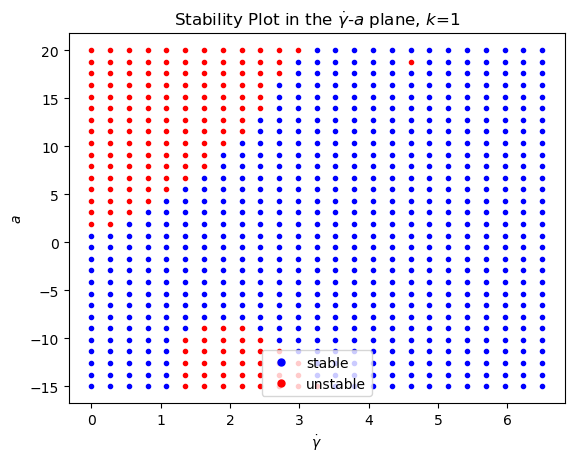

In [125]:
tau = 1
gdl, gdr, ngd = 0,6.5,25
al, ar, na = -15,20,30

graph_spectra_gd_a_grid([gdl,gdr,ngd], [al,ar,na], tau)